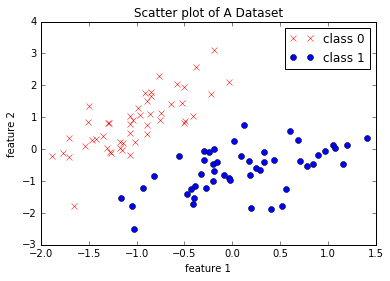

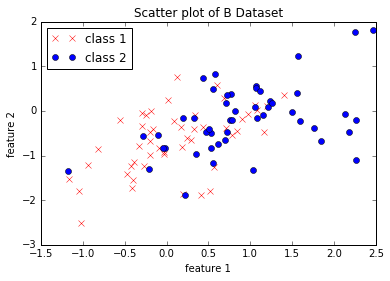

In [1]:
#1(a)
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

%matplotlib inline
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]
X,Y = ml.shuffleData(X,Y) 
X,_ = ml.rescale(X) 
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

plt.title("Scatter plot of A Dataset")
plt.plot( XA[YA==0,0], XA[YA==0,1],'x',color='r',label='class 0' )
plt.plot( XA[YA==1,0], XA[YA==1,1],'o',color='b',label='class 1')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(loc='upper right')
plt.show()
plt.title("Scatter plot of B Dataset")
plt.plot( XB[YB==1,0], XB[YB==1,1],'x',color='r',label='class 1' )
plt.plot( XB[YB==2,0], XB[YB==2,1],'o',color='b',label='class 2')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(loc='upper left')
plt.show()

In [47]:
    def plotBoundary(self,X,Y):
        theta_ = self.theta
        colors = ['r','g']   
        #change array to list as if self contains as list
        if(isinstance(self.theta, np.ndarray)):
            theta_=self.theta[0].tolist()             
        plt.ylim(X[:,1].min()-0.5,X[:,1].max()+0.5)
        x_points = np.linspace(X[:,0].min()-0.5,X[:,0].max()+0.5)
        #ax + by + c = 0 => y = -(a/b)*x - c/b  [b != 0]
        #0.5 + x - 0.25y  =0 [0.5,1,-0.25] theta_[0] = c, theta_[1] = a theta_[2] = b
        if(theta_[2]!=0):
            y_points=-((1.0*theta_[1])/(1.0*theta_[2])) * x_points - (1.0*theta_[0])/(1.0*theta_[2])
        #input()
            plt.plot(x_points,y_points,color='b')
        else:
            #ax = -c => x = -c/a
            y_points = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5)
            x_point1= np.zeros((50,))
            x_point1.fill(-(1.0 * theta_[0])/(1.0 *theta_[1]))
            plt.plot(x_point1,y_points,color='b')
        for c,i in enumerate(np.unique(Y)):
            plt.plot( X[Y==i,0], X[Y==i,1],'o',color=colors[c] )
            plt.xlabel("feature 1")
            plt.ylabel("feature 2")  
        plt.show()

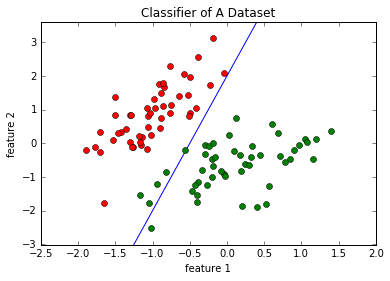

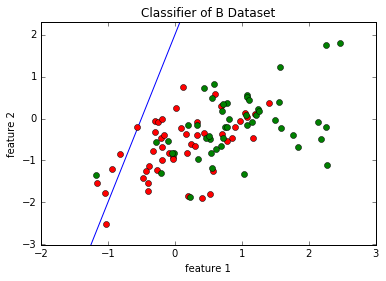

In [2]:
import mltools.logistic2 as lc2
reload(lc2) 
learner=lc2.logisticClassify2(); 
learner.classes = np.unique(YA) 
wts = [0.5,1,-0.25];
learner.theta=wts;
plt.title("Classifier of A Dataset")
learner.plotBoundary(XA,YA)
plt.title("Classifier of B Dataset")
learner.plotBoundary(XB,YB)

In [50]:
    def predict(self, X):
        yhat= np.zeros((X.shape[0],))
        # yhat_dash = theta 0 + theta1*x1 + theta2 * x2 
        #if yhat_dash > 0  store 1 class 1 else class 0
        for i in range(0,X.shape[0]):
            yhat_dash = self.theta[0] + self.theta[1] * X[i,0] + self.theta[2] * X[i,1]
            #print(yhat_dash)
            if (yhat_dash > 0):
                yhat[i] = self.classes[1]
            else: 
                yhat[i] = self.classes[0]
        return yhat

In [3]:
#0-1 error calculation using predict function
yhatA = learner.predict(XA);
error_rate_A = 0
for i in range(0,YA.shape[0]):
    if(YA[i]!=yhatA[i]):
        error_rate_A = error_rate_A +1
error_rate_A = error_rate_A*1.0/YA.shape[0]*1.0

yhatB = learner.predict(XB);

error_rate_B = 0
error_rate_B = error_rate_B*1.0/YB.shape[0]*1.0

for i in range(0,YA.shape[0]):
    if(YB[i]!=yhatB[i]):
        error_rate_B = error_rate_B +1
error_rate_B = error_rate_B*1.0/YB.shape[0]*1.0
print ("Error rate on classifier A : "+str(error_rate_A))
print ("Error rate on classifier B : "+str(error_rate_B))

Error rate on classifier A : 0.0505050505051
Error rate on classifier B : 0.545454545455


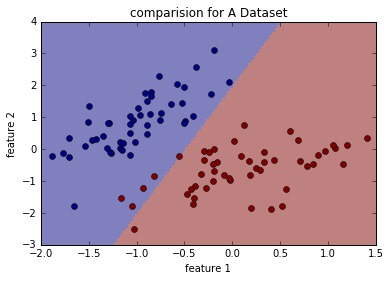

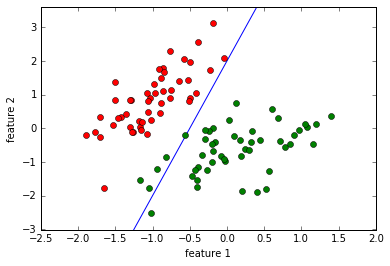

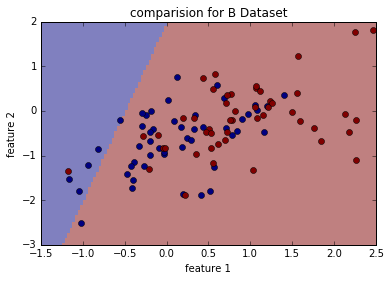

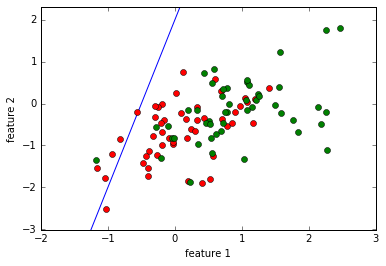

In [17]:
#1(d) For Predict Function verification, Comparision of plotBoundary and PlotClassify2D 
ml.plot.plotClassify2D(learner,XA,YA)
plt.title("comparision for A Dataset")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()
learner.plotBoundary(XA,YA)
plt.title("comparision for B Dataset")
ml.plot.plotClassify2D(learner,XB,YB)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()
learner.plotBoundary(XB,YB)

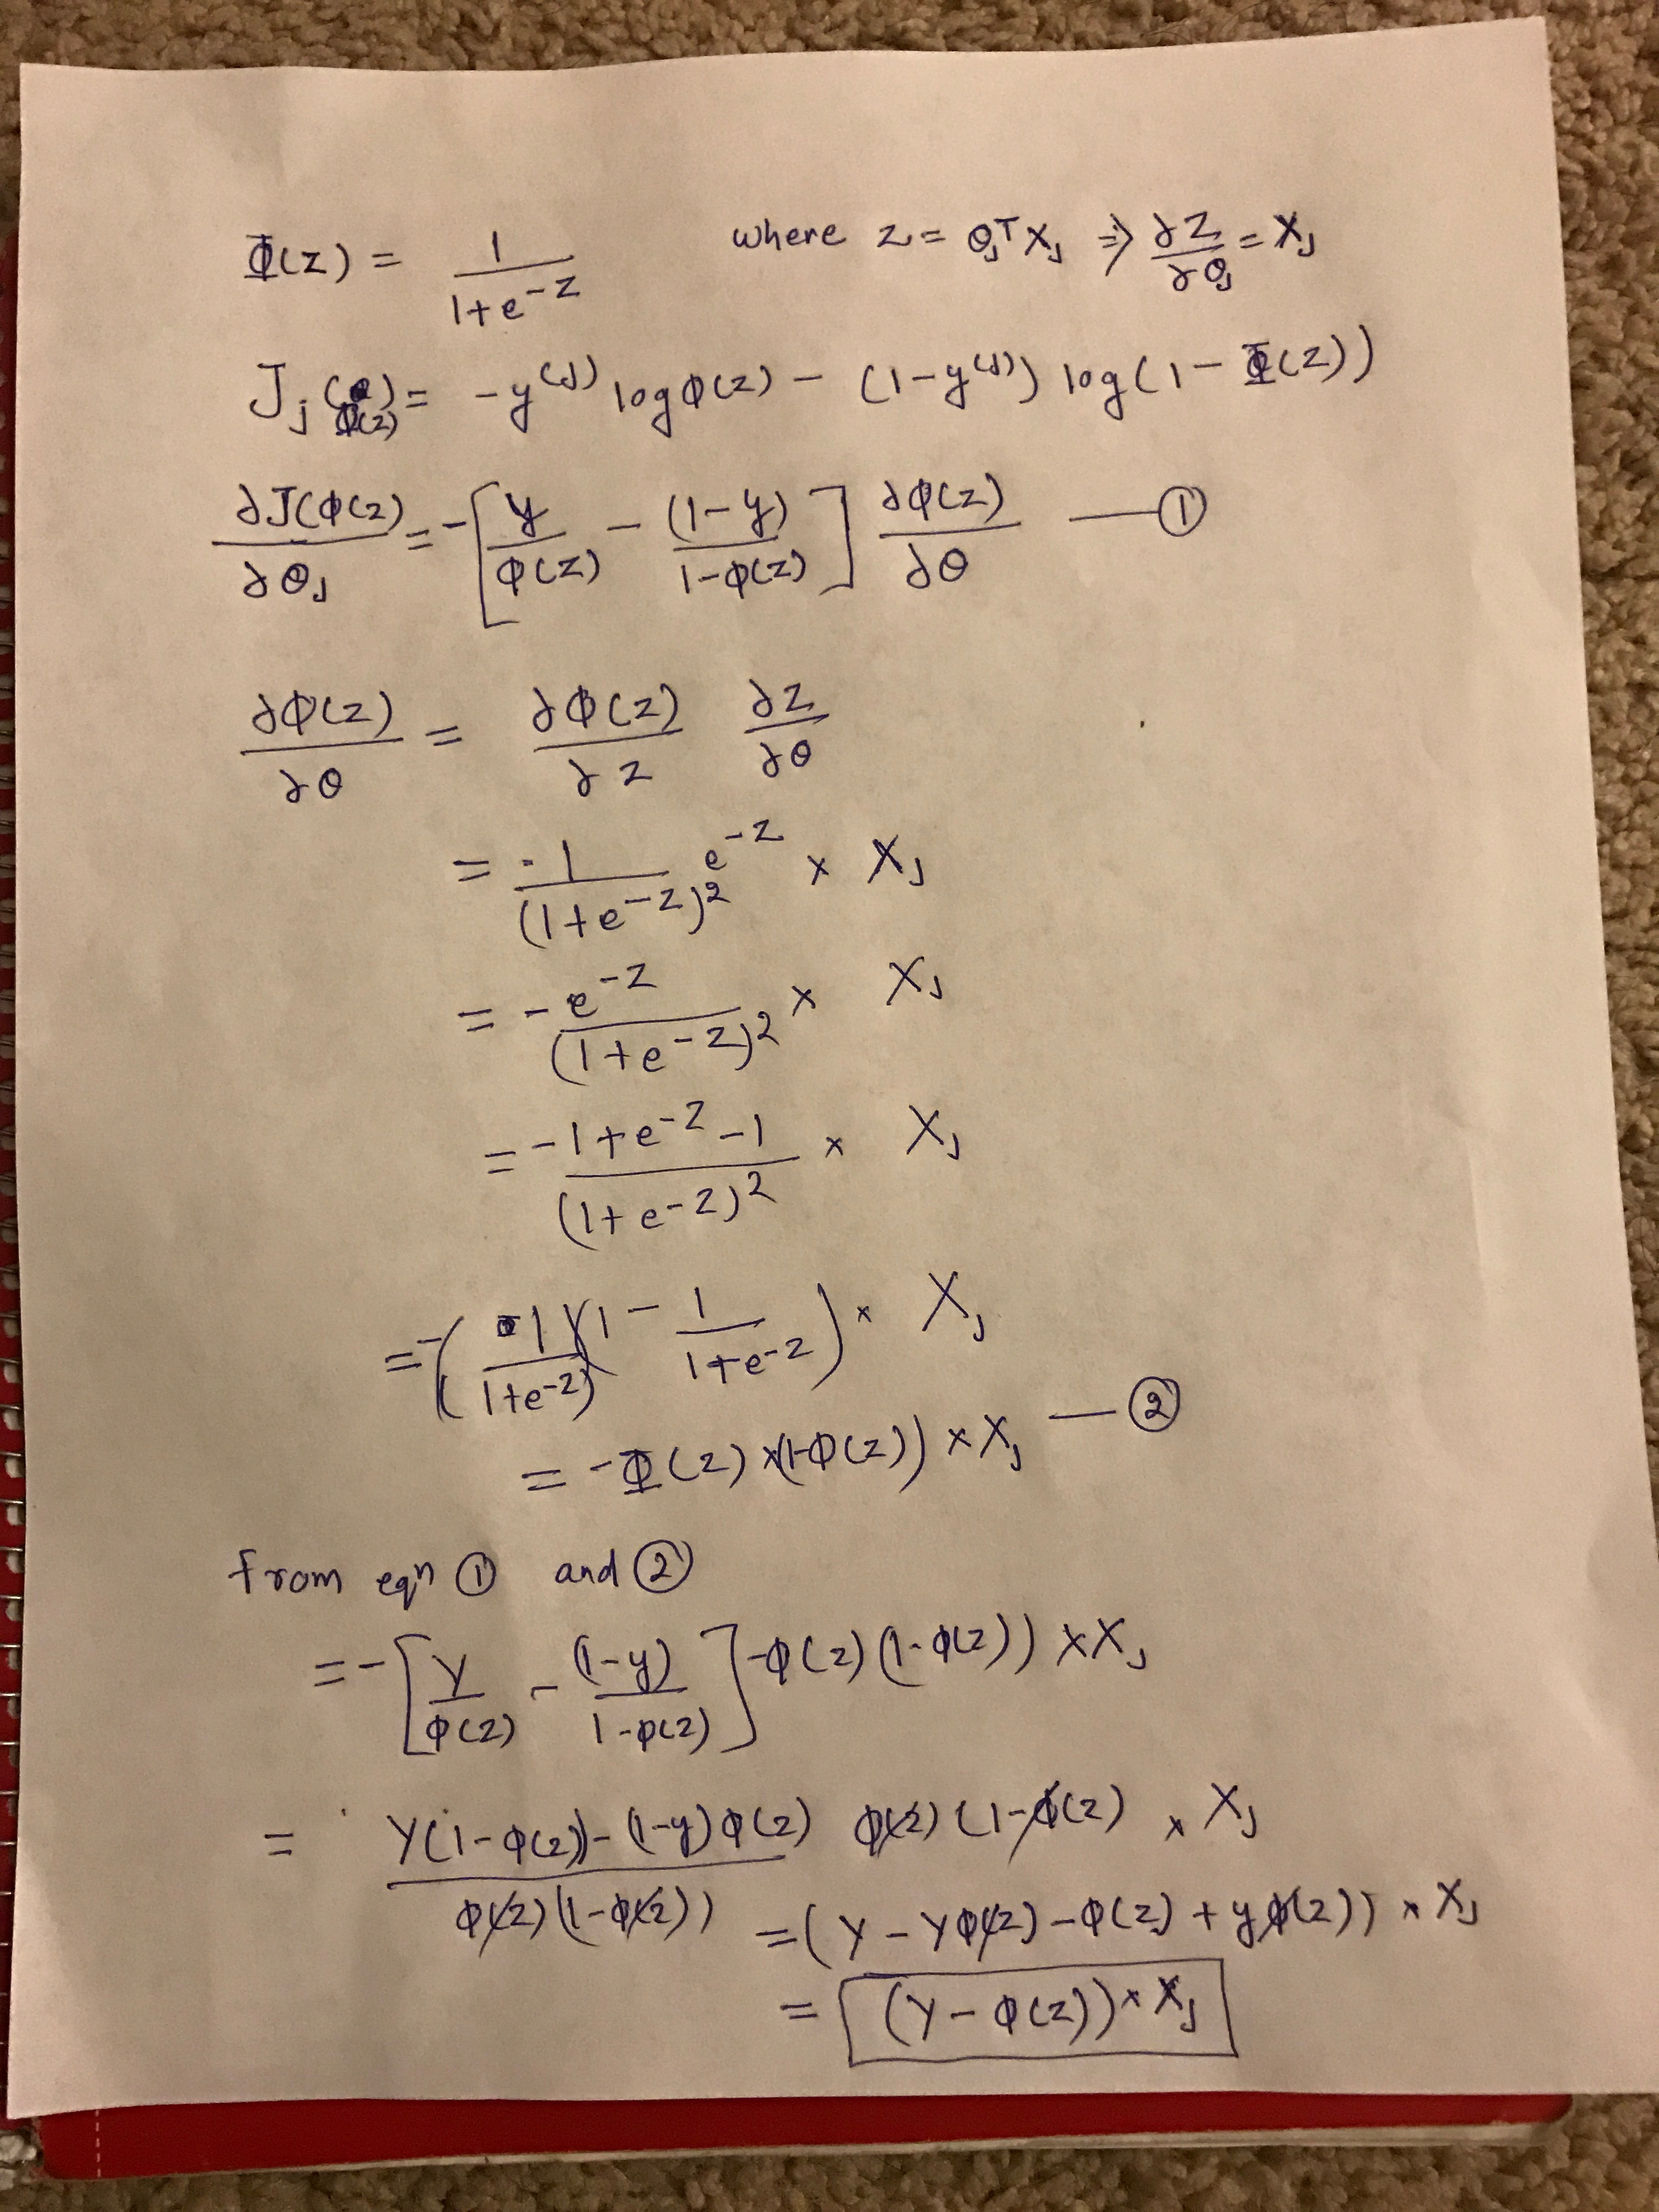

In [3]:
#1(e) Derviation of gradient of negative log Likelihood
from IPython.core.display import Image
Image(filename=('barada_derive.JPG'))

    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopIter=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        ## First do some bookkeeping and setup:
        self.theta,X,Y = twod(self.theta), arr(X), arr(Y)   # convert to numpy arrays
        M,N = X.shape
        if Y.shape[0] != M:
            raise ValueError("Y must have the same number of data (rows) as X")
        self.classes = np.unique(Y)
        if len(self.classes) != 2:
            raise ValueError("Y should have exactly two classes (binary problem expected)")
        if self.theta.shape[1] != N+1:         # if self.theta is empty, initialize it!
            self.theta = np.random.randn(1,N+1)
        # Some useful modifications of the data matrices:
        X1  = np.hstack((np.ones((M,1)),X))   
        Y01 = toIndex(Y, self.classes)         

        it   = 0
        done = False
        Jsur = [0]
        J01  = []
        self.err=[]
        self.sur_loss=[]
        while not done:
            step = (2.0 * initStep) / (2.0 + it)   
            J01i=[]
            yi=[]
            temp_loss  = 0
            for i in range(M):  # for each data point i:
                #compute zi = linear response of X[i,:]
                # compute prediction yi 
                #compute soft response si = logistic( zi )
                #compute gradient of logistic loss wrt data point i:
                zi=np.dot(X1[i,:],self.theta.T)

                if(zi>0):
                    yi.append(1)
                else:
                    yi.append(0)

                if(yi[i]!=Y01[i]):
                    temp_loss = temp_loss +1

                si=1.0/(1.0 + np.exp(-zi))
                
                gradi=X1[i,:]*(Y01[i]-si)
                
                # Take a step down the gradient
                
                self.theta = self.theta + step * gradi
                
                if(Y01[i]==1):
                    temp_surrloss = -1*(math.log(si))
                else :
                    temp_surloss = -1*(math.log(1-si))
                
                J01i.append(temp_surrloss)
            
            #J01.append(np.sum(yi!=Y01))
            J01.append(temp_loss)
            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (si log si) if yi==1 else ((1-si)log(1-si)) ]
            Jsur.append((sum(J01i)*1.0)/(len(J01i)*1.0))
            
           
            ## For debugging: print current parameters & losses
            # print self.theta, ' => ', Jsur[-1], ' / ', J01[-1]  
            # raw_input()   # pause for keystroke

            # check stopping criteria:
            it += 1
            done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
        self.sur_loss=Jsur[1:]
        self.err=J01

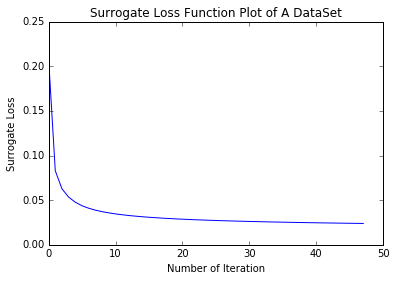

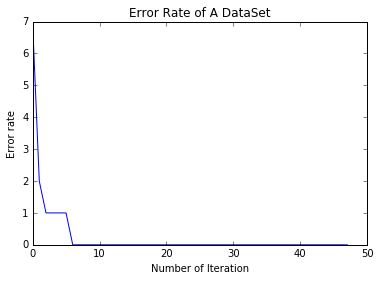

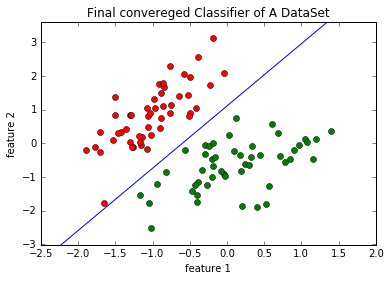

In [20]:
#1(f-g) Params: maximum number of Iterations=5000 Initialstepsize=1  dataset -A
import mltools.logistic2 as lc2
reload(lc2)
learner=lc2.logisticClassify2();
learner.train(XA,YA,stopIter=5000,initStep=1.0)
plt.title("Surrogate Loss Function Plot of A DataSet")
plt.plot(learner.sur_loss)
plt.xlabel("Number of Iteration")
plt.ylabel("Surrogate Loss")
plt.show()
plt.title("Error Rate of A DataSet")
plt.plot(learner.err)
plt.xlabel("Number of Iteration")
plt.ylabel("Error rate")
plt.show()
plt.title("Final convereged Classifier of A DataSet")
learner.plotBoundary(XA,YA)

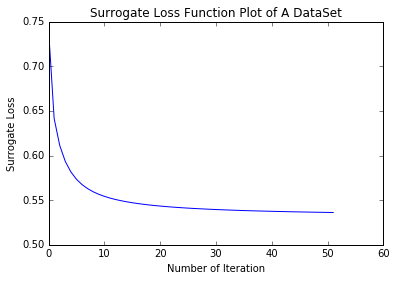

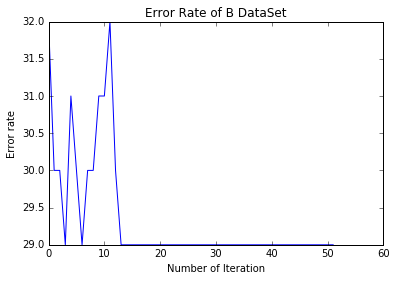

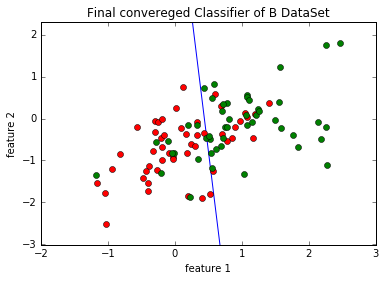

In [21]:
#1(f-g) Params: maximum number of Iterations=5000 Initialstepsize=1  dataset -A
import mltools.logistic2 as lc2
reload(lc2)
learner=lc2.logisticClassify2();
learner.train(XB,YB,stopIter=5000,initStep=1.0)
plt.title("Surrogate Loss Function Plot of A DataSet")
plt.plot(learner.sur_loss)
plt.xlabel("Number of Iteration")
plt.ylabel("Surrogate Loss")
plt.show()
plt.title("Error Rate of B DataSet")
plt.plot(learner.err)
plt.xlabel("Number of Iteration")
plt.ylabel("Error rate")
plt.show()
plt.title("Final convereged Classifier of B DataSet")
learner.plotBoundary(XB,YB)

#2
(a) T(a + bx1) 
In the the cases of (a), (b), It would shatter as it is a 2d line
1. As, It is a vertical line,It would shatter for (a) because when we draw a line, we can draw it on either sides of the single point, so it would classify points into two seperate classes.
2. in case of b, It would be able to shatter, because a line can be drawn on either sides of the two points(which are on a single line) and also can be in the middle, so we can  classify both the points.
3. In the case of (3), we would not be able to shatter, as we can place the points of same class on extreme ends with point of different class in between them.
4. In the case (d),It would not be able to shatter as the line would not be able to divide the points in case of same digonal opposite points.


(b) T((x1 − a)^2 + (x2 − b)^2 + c) 
It would be able to shatter the cases (a), (b)
This function represents a circle with center (a,b)
1. In the case (a), It would be able to shatter, as we can put a point either inside the circle or outside it, which will represent two different classes.
2. In the case (b),It would be able to shatter as either the two points could be inside the circle, or outside the circle. We can draw different circles for individual cases also which can put one points inside while keeping other one out side.
3. In The case (c) case would not be shattered by the circle,by looking into the locations of points, we can tell that it would not allow a circle to be formed in a way that only two points come inside the circle and not the other. 
4. The (d) case have similar problem, with two points.

(c)T((a ∗ b)x1 + (c/a)x2) 
It is a line passing through origin.So it would be of simiilar case as of question 1. 
In the the cases of (a), (b), It would shatter 
1. As, It is a vertical line,It would shatter for (a) because when we draw a line, we can draw it on either sides of the single point, so it would classify points into two seperate classes.
2. in case of b, It would be able to shatter, because a line can be drawn on either sides of the two points(which are on a single line) and also can be in the middle, so we can  classify both the points.
3. In the case of (3), we would not be able to shatter, as we can place the points of same class on extreme ends with point of different class in between them.
4. In the case (d),It would not be able to shatter as the line would not be able to divide the points in case of same digonal opposite points.